In [1]:
using PyCall

┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1278


In [2]:
using LinearAlgebra

In [29]:
using Plots
using LaTeXStrings

┌ Info: Precompiling LaTeXStrings [b964fa9f-0449-5b57-a5c2-d3ea65f4040f]
└ @ Base loading.jl:1278


In [36]:
pyplot()

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


Plots.PyPlotBackend()

In [4]:
@pyimport ase.io as aseio

In [5]:
m = aseio.read("me-rigid-shortaug3-pbe0-ts-tsfix-mbd.xyz", index=":");

In [6]:
m[1].info

Dict{Any,Any} with 6 entries:
  "mbd_energy"    => -0.00879323
  "ts_fix_energy" => -0.0119936
  "pbe0_energy"   => -0.00462892
  "mp2_energy"    => -0.00998655
  "ts_energy"     => -0.0108144
  "ccsdt_energy"  => -0.0110829

In [7]:
r = [norm(mm.positions[1,:]-mm.positions[6,:]) for mm in m];


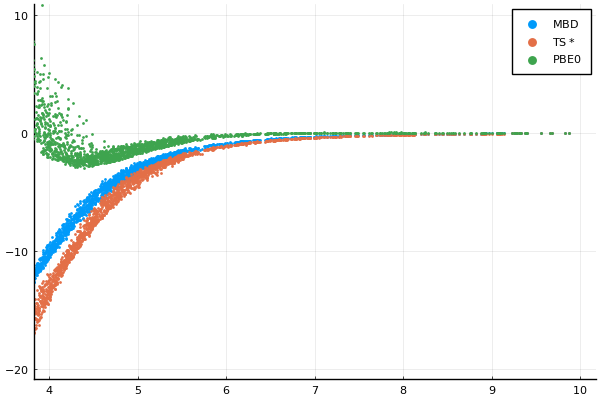

In [50]:
scatter(r, 1000/2*[mm.info["mbd_energy"] for mm in m], markersize=2, label=L"\rm{MBD}", markeralpha=1.0, markerstrokewidth=0)
scatter!(r, 1000/2*[mm.info["ts_fix_energy"] for mm in m], markersize=2, label=L"\rm{TS*}", markeralpha=1.0, markerstrokewidth=0)
plot!(legend=:bottomright)
scatter!(r, 1000/2*[mm.info["pbe0_energy"] for mm in m], markersize=2, label=L"\rm{PBE0}", markeralpha=1.0, markerstrokewidth=0)
plot!(legend=:topright, yrange=[-20,10], xrange=[4,10])

In [51]:
savefig("methane_dimer_lin.pdf")

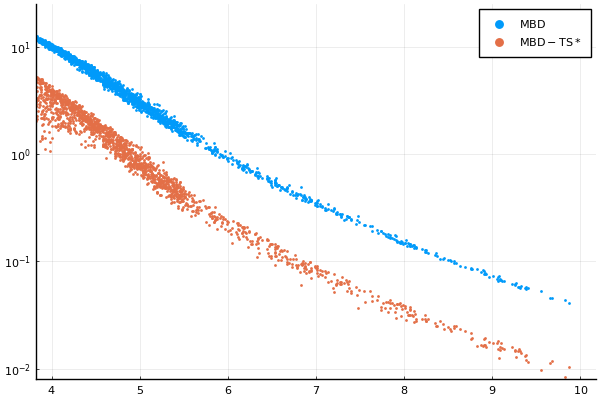

In [56]:
scatter(r, 1000/2*abs.([mm.info["mbd_energy"] for mm in m]), markersize=2, yscale=:log10, label=L"\rm{MBD}", markeralpha=1.0, markerstrokewidth=0)
scatter!(r, 1000/2*abs.([mm.info["ts_fix_energy"]-mm.info["mbd_energy"] for mm in m]), markersize=2, yscale=:log10, label=L"\rm{MBD} - \rm{TS*}", markeralpha=1.0, markerstrokewidth=0)
#scatter!(r, 1000/2*abs.([mm.info["pbe0_energy"] for mm in m]), markersize=2, label="PBE0", markeralpha=0.4, markerstrokewidth=0, yscale=:log10,)
plot!(legend=:topright, xrange=[4,10], yrange=[0.01,20])

In [57]:
savefig("methane_dimer_log.pdf")

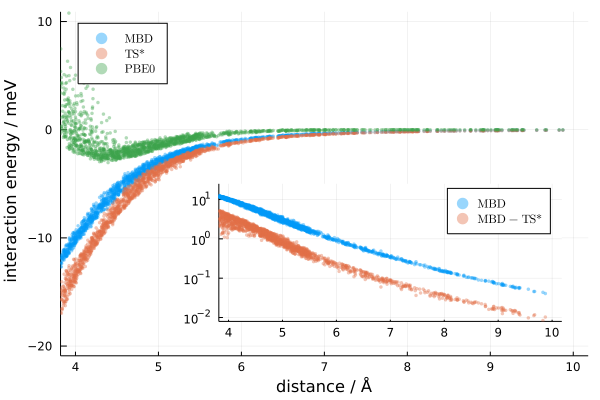

In [33]:
scatter(r, 1000/2*[mm.info["mbd_energy"] for mm in m], markersize=2, label=L"\rm{MBD}", markeralpha=1.0, markerstrokewidth=0)
scatter!(r, 1000/2*[mm.info["ts_fix_energy"] for mm in m], markersize=2, label=L"\rm{TS*}", markeralpha=1.0, markerstrokewidth=0)
scatter!(r, 1000/2*[mm.info["pbe0_energy"] for mm in m], markersize=2, label=L"\rm{PBE0}", markeralpha=1.0, markerstrokewidth=0)
scatter!(r, inset = (1, bbox(0.3, 0.1, 0.65, 0.4, :bottom)), subplot = 2, 1000/2*abs.([-mm.info["mbd_energy"] for mm in m]), markersize=2, yscale=:log10, label=L"\textrm{MBD}", markeralpha=0.4, markerstrokewidth=0)
scatter!(r, subplot = 2, 1000/2*abs.([mm.info["ts_fix_energy"]-mm.info["mbd_energy"] for mm in m]), markersize=2, yscale=:log10, label=L"\textrm{MBD} - \textrm{TS*}", markeralpha=0.4, markerstrokewidth=0)


plot!(legend=:topleft, subplot=1, xlabel="distance / Å", ylabel=" interaction energy / meV", xrange=[4,10], yrange=[-20,10])
plot!(legend=:topright, subplot=2, xrange=[4,10], yrange=[1e-2,20])


In [34]:
savefig("mbdtsfix.pdf")

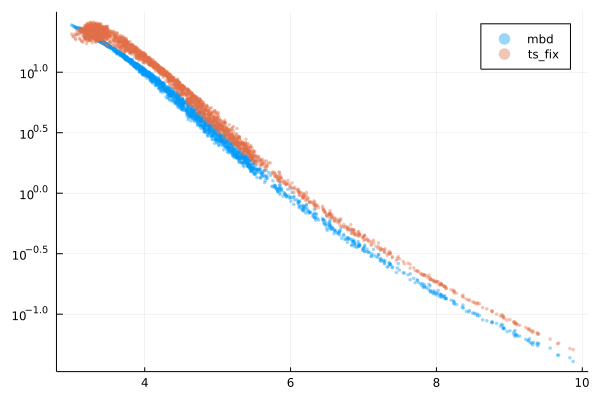

In [11]:
scatter(r, -1000/2*[mm.info["mbd_energy"] for mm in m], markersize=2, yscale=:log10, label="mbd", markeralpha=0.4, markerstrokewidth=0)
scatter!(r, -1000/2*[mm.info["ts_fix_energy"] for mm in m], markersize=2,  yscale=:log10, label="ts_fix", markeralpha=0.4, markerstrokewidth=0)
#scatter!(r, -[mm.info["ts_energy"] for mm in m], markersize=1,  yscale=:log10)
